In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar
import seaborn as sns

## Understanding Data

In [305]:
df=pd.read_csv("supply_chain_data.csv")

In [306]:
df

Product type    SKU      Price  Availability  Number of products sold  \
0      haircare   SKU0  69.808006            55                      802   
1      skincare   SKU1  14.843523            95                      736   
2      haircare   SKU2  11.319683            34                        8   
3      skincare   SKU3  61.163343            68                       83   
4      skincare   SKU4   4.805496            26                      871   
..          ...    ...        ...           ...                      ...   
95     haircare  SKU95  77.903927            65                      672   
96    cosmetics  SKU96  24.423131            29                      324   
97     haircare  SKU97   3.526111            56                       62   
98     skincare  SKU98  19.754605            43                      913   
99     haircare  SKU99  68.517833            17                      627   

    Revenue generated Customer demographics  Stock levels  Lead times  \
0         8661.996792               Diverse            58         7.0   
1         7460.900065                Female            53        30.0   
2         9577.749626          Not Provided             1        10.0   
3         7766.836426               Diverse            23        13.0   
4         2686.505152               Diverse             5         3.0   
..                ...                   ...           ...         ...   
95        7386.363944          Not Provided            15        14.0   
96        7698.424766               Diverse            67         2.0   
97        4370.916580                  Male            46        19.0   
98        8525.952560                Female            53         1.0   
99        9185.185829          Not Provided            55         8.0   

    Order quantities  ...  Location Lead time  Production volumes  \
0                 96  ...    Mumbai      29.0                 215   
1                 37  ...    Mumbai      23.0                 517   
2                 88  ...    Mumbai      12.0                 971   
3                 59  ...   Kolkata      24.0                 937   
4                 56  ...     Delhi       5.0                 414   
..               ...  ...       ...       ...                 ...   
95                26  ...    Mumbai      18.0                 450   
96                32  ...    Mumbai      28.0                 648   
97                 4  ...    Mumbai      10.0                 535   
98                27  ...   Chennai      28.0                 581   
99                59  ...   Chennai      29.0                 921   

   Manufacturing lead time Manufacturing costs  Inspection results  \
0                       29           46.279879             Pending   
1                       30           33.616769             Pending   
2                       27           30.688019             Pending   
3                       18           35.624741                Fail   
4                        3           92.065161                Fail   
..                     ...                 ...                 ...   
95                      26           58.890686             Pending   
96                      28           17.803756             Pending   
97                      13           65.765156                Fail   
98                       9            5.604691             Pending   
99                       2           38.072899                Fail   

    Defect rates  Transportation modes   Routes       Costs  
0       0.226410                  Road  Route B  187.752075  
1       4.854068                  Road  Route B  503.065579  
2       4.580593                   Air  Route C  141.920282  
3       4.746649                  Rail  Route A  254.776159  
4       3.145580                   Air  Route A  923.440632  
..           ...                   ...      ...         ...  
95      1.210882                   Air  Route A  778.864241  
96      3.872048                  Road  Route A

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    float64
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    float64
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [308]:
df.head()

Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792               Diverse            58         7.0   
1        7460.900065                Female            53        30.0   
2        9577.749626          Not Provided             1        10.0   
3        7766.836426               Diverse            23        13.0   
4        2686.505152               Diverse             5         3.0   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai      29.0                 215   
1                37  ...    Mumbai      23.0                 517   
2                88  ...    Mumbai      12.0                 971   
3                59  ...   Kolkata      24.0                 937   
4                56  ...     Delhi       5.0                 414   

  Manufacturing lead time Manufacturing costs  Inspection results  \
0                      29           46.279879             Pending   
1                      30           33.616769             Pending   
2                      27           30.688019             Pending   
3                      18           35.624741                Fail   
4                       3           92.065161                Fail   

   Defect rates  Transportation modes   Routes       Costs  
0      0.226410                  Road  Route B  187.752075  
1      4.854068                  Road  Route B  503.065579  
2      4.580593                   Air  Route C  141.920282  
3      4.746649                  Rail  Route A  254.776159  
4      3.145580                   Air  Route A  923.440632  

[5 rows x 24 columns]

In [309]:
df.tail()

Product type    SKU      Price  Availability  Number of products sold  \
95     haircare  SKU95  77.903927            65                      672   
96    cosmetics  SKU96  24.423131            29                      324   
97     haircare  SKU97   3.526111            56                       62   
98     skincare  SKU98  19.754605            43                      913   
99     haircare  SKU99  68.517833            17                      627   

    Revenue generated Customer demographics  Stock levels  Lead times  \
95        7386.363944          Not Provided            15        14.0   
96        7698.424766               Diverse            67         2.0   
97        4370.916580                  Male            46        19.0   
98        8525.952560                Female            53         1.0   
99        9185.185829          Not Provided            55         8.0   

    Order quantities  ...  Location Lead time  Production volumes  \
95                26  ...    Mumbai      18.0                 450   
96                32  ...    Mumbai      28.0                 648   
97                 4  ...    Mumbai      10.0                 535   
98                27  ...   Chennai      28.0                 581   
99                59  ...   Chennai      29.0                 921   

   Manufacturing lead time Manufacturing costs  Inspection results  \
95                      26           58.890686             Pending   
96                      28           17.803756             Pending   
97                      13           65.765156                Fail   
98                       9            5.604691             Pending   
99                       2           38.072899                Fail   

    Defect rates  Transportation modes   Routes       Costs  
95      1.210882                   Air  Route A  778.864241  
96      3.872048                  Road  Route A  188.742141  
97      3.376238                  Road  Route A  540.132423  
98      2.908122                  Rail  Route A  882.198864  
99      0.346027                  Rail  Route B  210.743009  

[5 rows x 24 columns]

In [310]:
df.describe()

Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0.000000    1.000000          1.000000        1.000000   
25%       16.750000    8.000000         26.000000        3.750000   
50%       47.500000   17.000000         52.000000        6.000000   
75%       73.000000   24.000000         71.250000        8.000000   
max      100.000000   30.000000         96.000000       10.000000   

       Shipping costs   Lead time  Production volumes  \
count      100.000000  100.000000          100.000000   
mean         5.548149   17.080000          567.840000   
std          2.651376    8.846251          263.046861   
min          1.013487    1.000000          104.000000   
25%          3.540248   10.000000          352.000000   
50%          5.320534   18.000000          568.500000   
75%          7.601695   25.000000          797.000000   
max          9.929816   30.000000          985.000000   

       Manufacturing lead time  Manufacturing costs  Defect rates       Costs  
count                100.00000           100.000000    100.000000  100.000000  
mean                  14.77000            47.266693      2.277158  529.245782  
std                    8.91243            28.982841      1.461366  258.301696  
min                    1.00000             1.085069      0.018608  103.916248  
25%                    7.00000            22.983299      1.009650  318.778455  
50%                   14.00000            45.905622      2.141863  520.430444  
75%                   23.00000            68.621026      3.563995  763.078231  
max                   30.00000            99.466109      4.939255  997.413450

In [311]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [312]:
df.shape

(100, 24)

In [313]:
df.nunique()

Product type                 3
SKU                        100
Price                      100
Availability                63
Number of products sold     96
Revenue generated          100
Customer demographics        4
Stock levels                65
Lead times                  29
Order quantities            61
Shipping times              10
Shipping carriers            3
Shipping costs             100
Supplier name                5
Location                     5
Lead time                   29
Production volumes          96
Manufacturing lead time     30
Manufacturing costs        100
Inspection results           3
Defect rates               100
Transportation modes         4
Routes                       3
Costs                      100
dtype: int64

## 2)Data Cleaning

## 1-Removing Duplicates

In [316]:
df=df.drop_duplicates()
df

Product type    SKU      Price  Availability  Number of products sold  \
0      haircare   SKU0  69.808006            55                      802   
1      skincare   SKU1  14.843523            95                      736   
2      haircare   SKU2  11.319683            34                        8   
3      skincare   SKU3  61.163343            68                       83   
4      skincare   SKU4   4.805496            26                      871   
..          ...    ...        ...           ...                      ...   
95     haircare  SKU95  77.903927            65                      672   
96    cosmetics  SKU96  24.423131            29                      324   
97     haircare  SKU97   3.526111            56                       62   
98     skincare  SKU98  19.754605            43                      913   
99     haircare  SKU99  68.517833            17                      627   

    Revenue generated Customer demographics  Stock levels  Lead times  \
0         8661.996792               Diverse            58         7.0   
1         7460.900065                Female            53        30.0   
2         9577.749626          Not Provided             1        10.0   
3         7766.836426               Diverse            23        13.0   
4         2686.505152               Diverse             5         3.0   
..                ...                   ...           ...         ...   
95        7386.363944          Not Provided            15        14.0   
96        7698.424766               Diverse            67         2.0   
97        4370.916580                  Male            46        19.0   
98        8525.952560                Female            53         1.0   
99        9185.185829          Not Provided            55         8.0   

    Order quantities  ...  Location Lead time  Production volumes  \
0                 96  ...    Mumbai      29.0                 215   
1                 37  ...    Mumbai      23.0                 517   
2                 88  ...    Mumbai      12.0                 971   
3                 59  ...   Kolkata      24.0                 937   
4                 56  ...     Delhi       5.0                 414   
..               ...  ...       ...       ...                 ...   
95                26  ...    Mumbai      18.0                 450   
96                32  ...    Mumbai      28.0                 648   
97                 4  ...    Mumbai      10.0                 535   
98                27  ...   Chennai      28.0                 581   
99                59  ...   Chennai      29.0                 921   

   Manufacturing lead time Manufacturing costs  Inspection results  \
0                       29           46.279879             Pending   
1                       30           33.616769             Pending   
2                       27           30.688019             Pending   
3                       18           35.624741                Fail   
4                        3           92.065161                Fail   
..                     ...                 ...                 ...   
95                      26           58.890686             Pending   
96                      28           17.803756             Pending   
97                      13           65.765156                Fail   
98                       9            5.604691             Pending   
99                       2           38.072899                Fail   

    Defect rates  Transportation modes   Routes       Costs  
0       0.226410                  Road  Route B  187.752075  
1       4.854068                  Road  Route B  503.065579  
2       4.580593                   Air  Route C  141.920282  
3       4.746649                  Rail  Route A  254.776159  
4       3.145580                   Air  Route A  923.440632  
..           ...                   ...      ...         ...  
95      1.210882                   Air  Route A  778.864241  
96      3.872048                  Road  Route A

## 2-Data Types

In [318]:
print(df.dtypes)

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                 float64
Order quantities             int64
Shipping times             float64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                  float64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object


In [319]:
df['Lead times'] = pd.to_numeric(df['Lead times'], errors='coerce').astype('float64')

In [320]:
df["Shipping times"]=pd.to_numeric(df["Shipping times"],errors='coerce').astype('float64')

In [321]:
df["Lead time"]=pd.to_numeric(df["Lead time"],errors='coerce').astype('float64')

In [322]:
print(df.dtypes)

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                 float64
Order quantities             int64
Shipping times             float64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                  float64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object


## 3-Mapping

In [324]:
df

Product type    SKU      Price  Availability  Number of products sold  \
0      haircare   SKU0  69.808006            55                      802   
1      skincare   SKU1  14.843523            95                      736   
2      haircare   SKU2  11.319683            34                        8   
3      skincare   SKU3  61.163343            68                       83   
4      skincare   SKU4   4.805496            26                      871   
..          ...    ...        ...           ...                      ...   
95     haircare  SKU95  77.903927            65                      672   
96    cosmetics  SKU96  24.423131            29                      324   
97     haircare  SKU97   3.526111            56                       62   
98     skincare  SKU98  19.754605            43                      913   
99     haircare  SKU99  68.517833            17                      627   

    Revenue generated Customer demographics  Stock levels  Lead times  \
0         8661.996792               Diverse            58         7.0   
1         7460.900065                Female            53        30.0   
2         9577.749626          Not Provided             1        10.0   
3         7766.836426               Diverse            23        13.0   
4         2686.505152               Diverse             5         3.0   
..                ...                   ...           ...         ...   
95        7386.363944          Not Provided            15        14.0   
96        7698.424766               Diverse            67         2.0   
97        4370.916580                  Male            46        19.0   
98        8525.952560                Female            53         1.0   
99        9185.185829          Not Provided            55         8.0   

    Order quantities  ...  Location Lead time  Production volumes  \
0                 96  ...    Mumbai      29.0                 215   
1                 37  ...    Mumbai      23.0                 517   
2                 88  ...    Mumbai      12.0                 971   
3                 59  ...   Kolkata      24.0                 937   
4                 56  ...     Delhi       5.0                 414   
..               ...  ...       ...       ...                 ...   
95                26  ...    Mumbai      18.0                 450   
96                32  ...    Mumbai      28.0                 648   
97                 4  ...    Mumbai      10.0                 535   
98                27  ...   Chennai      28.0                 581   
99                59  ...   Chennai      29.0                 921   

   Manufacturing lead time Manufacturing costs  Inspection results  \
0                       29           46.279879             Pending   
1                       30           33.616769             Pending   
2                       27           30.688019             Pending   
3                       18           35.624741                Fail   
4                        3           92.065161                Fail   
..                     ...                 ...                 ...   
95                      26           58.890686             Pending   
96                      28           17.803756             Pending   
97                      13           65.765156                Fail   
98                       9            5.604691             Pending   
99                       2           38.072899                Fail   

    Defect rates  Transportation modes   Routes       Costs  
0       0.226410                  Road  Route B  187.752075  
1       4.854068                  Road  Route B  503.065579  
2       4.580593                   Air  Route C  141.920282  
3       4.746649                  Rail  Route A  254.776159  
4       3.145580                   Air  Route A  923.440632  
..           ...                   ...      ...         ...  
95      1.210882                   Air  Route A  778.864241  
96      3.872048                  Road  Route A

In [325]:
df['Customer demographics'].unique

<bound method Series.unique of 0          Diverse
1           Female
2     Not Provided
3          Diverse
4          Diverse
          ...     
95    Not Provided
96         Diverse
97            Male
98          Female
99    Not Provided
Name: Customer demographics, Length: 100, dtype: object>

In [326]:
df['Customer demographics'] = df['Customer demographics'].replace({
    'Non-binary': 'Diverse',  
    'Unknown': 'Not Provided'  
})


In [327]:
df

Product type    SKU      Price  Availability  Number of products sold  \
0      haircare   SKU0  69.808006            55                      802   
1      skincare   SKU1  14.843523            95                      736   
2      haircare   SKU2  11.319683            34                        8   
3      skincare   SKU3  61.163343            68                       83   
4      skincare   SKU4   4.805496            26                      871   
..          ...    ...        ...           ...                      ...   
95     haircare  SKU95  77.903927            65                      672   
96    cosmetics  SKU96  24.423131            29                      324   
97     haircare  SKU97   3.526111            56                       62   
98     skincare  SKU98  19.754605            43                      913   
99     haircare  SKU99  68.517833            17                      627   

    Revenue generated Customer demographics  Stock levels  Lead times  \
0         8661.996792               Diverse            58         7.0   
1         7460.900065                Female            53        30.0   
2         9577.749626          Not Provided             1        10.0   
3         7766.836426               Diverse            23        13.0   
4         2686.505152               Diverse             5         3.0   
..                ...                   ...           ...         ...   
95        7386.363944          Not Provided            15        14.0   
96        7698.424766               Diverse            67         2.0   
97        4370.916580                  Male            46        19.0   
98        8525.952560                Female            53         1.0   
99        9185.185829          Not Provided            55         8.0   

    Order quantities  ...  Location Lead time  Production volumes  \
0                 96  ...    Mumbai      29.0                 215   
1                 37  ...    Mumbai      23.0                 517   
2                 88  ...    Mumbai      12.0                 971   
3                 59  ...   Kolkata      24.0                 937   
4                 56  ...     Delhi       5.0                 414   
..               ...  ...       ...       ...                 ...   
95                26  ...    Mumbai      18.0                 450   
96                32  ...    Mumbai      28.0                 648   
97                 4  ...    Mumbai      10.0                 535   
98                27  ...   Chennai      28.0                 581   
99                59  ...   Chennai      29.0                 921   

   Manufacturing lead time Manufacturing costs  Inspection results  \
0                       29           46.279879             Pending   
1                       30           33.616769             Pending   
2                       27           30.688019             Pending   
3                       18           35.624741                Fail   
4                        3           92.065161                Fail   
..                     ...                 ...                 ...   
95                      26           58.890686             Pending   
96                      28           17.803756             Pending   
97                      13           65.765156                Fail   
98                       9            5.604691             Pending   
99                       2           38.072899                Fail   

    Defect rates  Transportation modes   Routes       Costs  
0       0.226410                  Road  Route B  187.752075  
1       4.854068                  Road  Route B  503.065579  
2       4.580593                   Air  Route C  141.920282  
3       4.746649                  Rail  Route A  254.776159  
4       3.145580                   Air  Route A  923.440632  
..           ...                   ...      ...         ...  
95      1.210882                   Air  Route A  778.864241  
96      3.872048                  Road  Route A

## 4) Missing Data

In [329]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

## 5) Outliers

<Axes: ylabel='Price'>

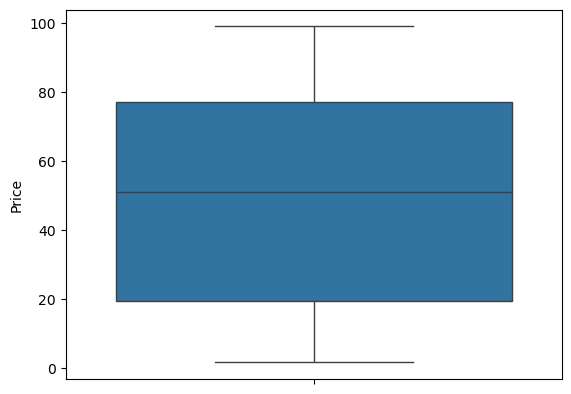

In [331]:
sns.boxplot(df['Price'])

<Axes: ylabel='Production volumes'>

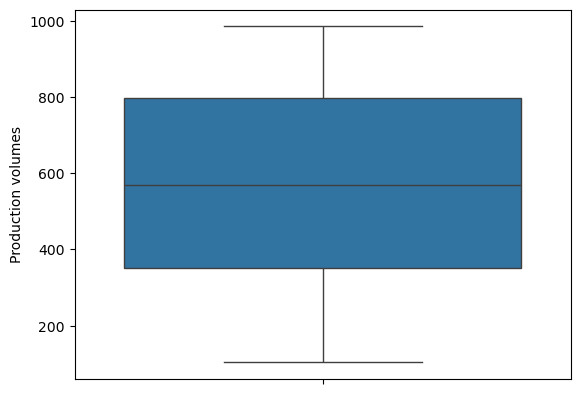

In [332]:
sns.boxplot(df['Production volumes'])

<Axes: ylabel='Costs'>

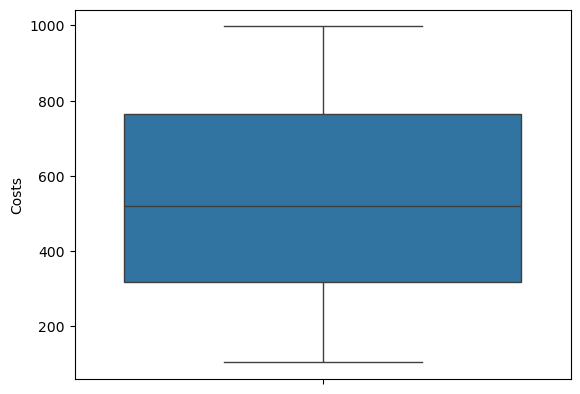

In [333]:
sns.boxplot(df['Costs'])

## Answering Questions

## Q1)Revenue Analysis by Customer Demographics and Product Type

In [336]:
revenue_avg_by_prod = df.groupby(['Customer demographics', 'Product type'])['Revenue generated'].mean().reset_index()
revenue_sum_by_prod = df.groupby(['Customer demographics', 'Product type'])['Revenue generated'].sum().reset_index()

([0, 1, 2],
 [Text(0, 0, 'cosmetics'), Text(1, 0, 'haircare'), Text(2, 0, 'skincare')])

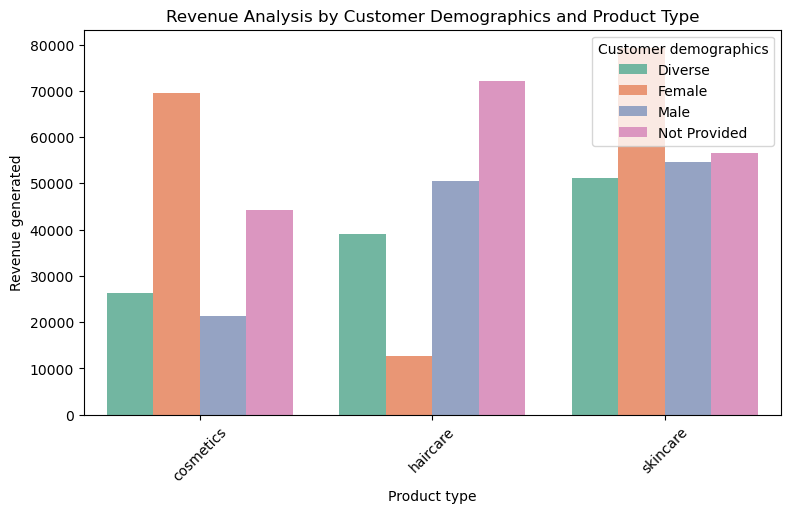

In [337]:
plt.figure(figsize=(9,5))
plt.title('Revenue Analysis by Customer Demographics and Product Type')
sns.barplot(x='Product type', y='Revenue generated', hue='Customer demographics', data=revenue_sum_by_prod, palette='Set2')
plt.xlabel('Product type')
plt.ylabel('Revenue generated')
plt.xticks(rotation=45)

## Q2)How does the  transportation mode impact cost  ?

In [339]:
df_transportation_impact=df.groupby('Transportation modes')['Costs'].sum()
df_transportation_impact

Transportation modes
Air     14604.527498
Rail    15168.931559
Road    16048.193639
Sea      7102.925520
Name: Costs, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Air'),
  Text(1, 0, 'Rail'),
  Text(2, 0, 'Road'),
  Text(3, 0, 'Sea')])

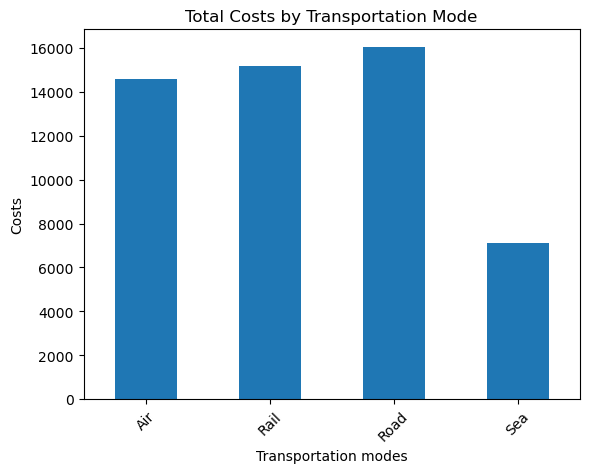

In [340]:
df_transportation_impact.plot(kind='bar',title='Total Costs by Transportation Mode')
plt.xlabel("Transportation modes")
plt.ylabel("Costs")
plt.xticks(rotation=45)

## Q3) Find the most optimal production volume to minimize manufacturing cost

In [342]:
coefficients = np.polyfit(df["Production volumes"], df["Manufacturing costs"], 2)
cost_function = np.poly1d(coefficients)
result = minimize_scalar(cost_function, bounds=(df["Production volumes"].min(), df["Production volumes"].max()), method='bounded')
optimal_volume = result.x
min_cost = cost_function(optimal_volume)
print(f"Optimal Production Volume: {optimal_volume:.2f}")
print(f"Minimum Manufacturing Cost: {min_cost:.2f}")


Optimal Production Volume: 104.00
Minimum Manufacturing Cost: 41.97


## Q4)Is there a correlation between manufacturing costs and production volumes ?

In [344]:
correlation=df['Manufacturing costs'].corr(df['Production volumes'])
correlation

0.051504171323681486

Text(0, 0.5, 'Production volumes')

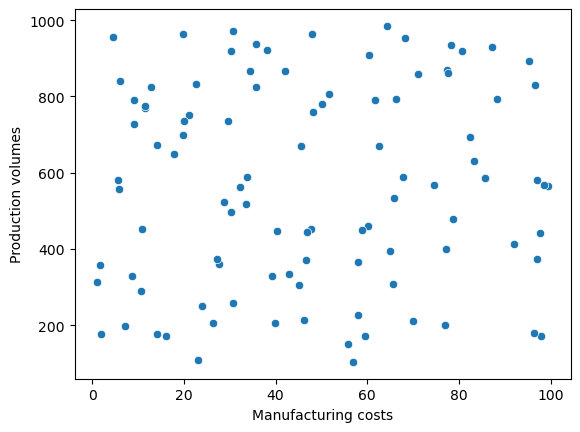

In [345]:
sns.scatterplot(x='Manufacturing costs', y='Production volumes',data=df)
plt.xlabel('Manufacturing costs')
plt.ylabel('Production volumes')

## Q5)Which supplier has the highest total sales, and which product contributes the most to those sales?

In [347]:
df['Total sales']=df['Price']*df['Number of products sold']

In [348]:
df_sales_product=df.groupby('Supplier name')['Total sales'].sum().reset_index()
df_sales_product

Supplier name    Total sales
0    Supplier 1  695863.099852
1    Supplier 2  513672.271344
2    Supplier 3  406030.515180
3    Supplier 4  342440.322876
4    Supplier 5  327543.755425

In [349]:
top_supplier = df_sales_product.loc[df_sales_product['Total sales'].idxmax(), 'Supplier name']
top_supplier

'Supplier 1'

In [350]:
supplier1_products=df[df['Supplier name'] == 'Supplier 1']
top_product=supplier1_products.sort_values(by='Total sales',ascending=False).iloc[0]
top_product['Product type']

'skincare'

## Q6)What is the defect rate for each product? 

In [352]:
df['Product type'].unique

<bound method Series.unique of 0      haircare
1      skincare
2      haircare
3      skincare
4      skincare
        ...    
95     haircare
96    cosmetics
97     haircare
98     skincare
99     haircare
Name: Product type, Length: 100, dtype: object>

In [353]:
df_product_defect=df.groupby('Product type')[['Defect rates','Order quantities']].mean()
df_product_defect

Defect rates  Order quantities
Product type                                
cosmetics         1.919287         51.653846
haircare          2.483150         43.529412
skincare          2.334681         52.475000

(array([0, 1, 2]),
 [Text(0, 0, 'cosmetics'), Text(1, 0, 'haircare'), Text(2, 0, 'skincare')])

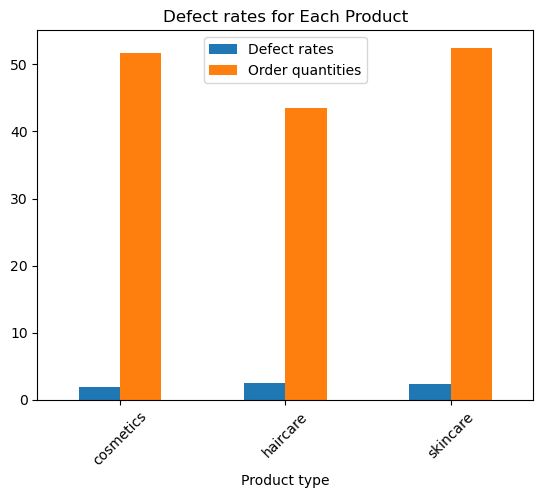

In [354]:
df_product_defect.plot(kind='bar',title='Defect rates for Each Product')
plt.xticks(rotation=45)

## Q7)Which products have the highest number of orders ?

In [356]:
df_product_order=df.groupby('Product type')['Number of products sold'].sum()
df_product_order

Product type
cosmetics    11757
haircare     13611
skincare     20731
Name: Number of products sold, dtype: int64

In [357]:
df_order_count = df.groupby('Product type').size().reset_index(name='Number of Orders')
df_product_stats = pd.merge(df_product_order, df_order_count, on='Product type')
df_sorted = df_product_stats.sort_values(by='Number of Orders', ascending=False)
df_sorted.head()

Product type  Number of products sold  Number of Orders
2     skincare                    20731                40
1     haircare                    13611                34
0    cosmetics                    11757                26

## Q8) Shipping costs for each shipping company and knowing the best shipping company

In [359]:
shipping_stats=df.groupby('Shipping carriers').agg(
    total_shiping_cost=('Shipping costs','sum'),
    average_shipping_cost=('Shipping costs','mean'),
    average_shipping_time=('Shipping times','mean') 
).reset_index()
shipping_stats=shipping_stats.sort_values('total_shiping_cost', ascending=False)
shipping_stats

Shipping carriers  total_shiping_cost  average_shipping_cost  \
1         Carrier B          236.897620               5.509247   
2         Carrier C          162.379457               5.599292   
0         Carrier A          155.537831               5.554923   

   average_shipping_time  
1               5.302326  
2               6.034483  
0               6.142857

C:\Users\aomai\AppData\Local\Temp\ipykernel_11452\383283173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_shiping_cost", y="Shipping carriers", data=shipping_stats, palette="viridis")


Text(0.5, 1.0, 'Best Shipping Carriers by Total Shipping Cost')

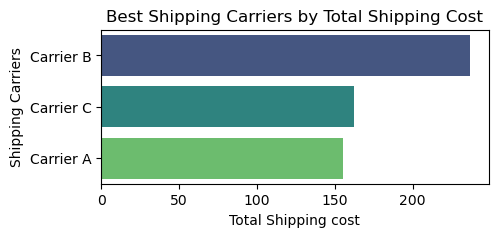

In [360]:
plt.figure(figsize=(5, 2))
sns.barplot(x="total_shiping_cost", y="Shipping carriers", data=shipping_stats, palette="viridis")
plt.xlabel('Total Shipping cost')
plt.ylabel('Shipping Carriers')
plt.title('Best Shipping Carriers by Total Shipping Cost')

## Q9)Which suppliers have the longest lead times?

In [362]:
supplier_stats = df.groupby("Supplier name").agg(AverageLeadTime=("Lead time", "mean")).reset_index()

In [363]:
supplier_stats = supplier_stats.sort_values("AverageLeadTime", ascending=False)

In [364]:
supplier_stats.head(1)

Supplier name  AverageLeadTime
2    Supplier 3        20.133333

## Q10)What is the relationship between average lead time and stock level?

In [366]:
df_supp_stock = df.groupby("Supplier name").agg(
    Average_Lead_Time=("Lead time", "mean"),
    Average_Stock_Level=("Stock levels", "mean")
).reset_index()

Text(0.5, 1.0, 'Relationship between average lead time and stock level')

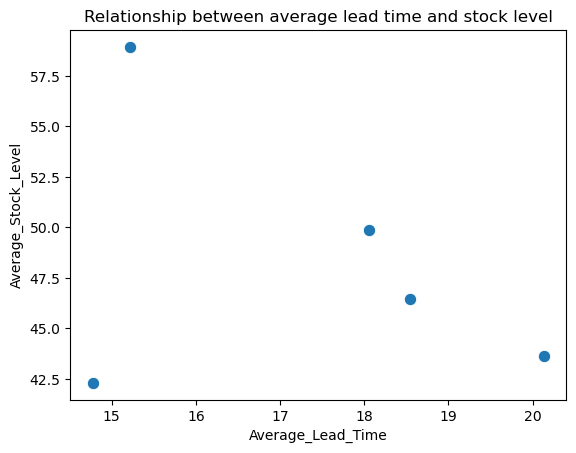

In [367]:
sns.scatterplot(x='Average_Lead_Time',y='Average_Stock_Level',data=df_supp_stock,s=80)
plt.xlabel('Average_Lead_Time')
plt.ylabel('Average_Stock_Level')
plt.title("Relationship between average lead time and stock level")